In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
social_df = pd.read_csv("cleaned_social_media.csv")
eeg_df = pd.read_csv("eeg_features_combined_with_demographics.csv")

In [17]:
social_df['Influence Level'] = social_df['Influence Level'].map({
    'Not Influential': 1,
    'Somewhat Influential': 2,
    'Influential': 3,
    'Very Influential': 4
})

In [19]:
scaler = StandardScaler()
social_columns = ['Social Media Usage (Hours/Day)', 'Influence Level', 'Purchase Decision', 'Amount Spent (USD)']
eeg_columns = ['Delta', 'Theta', 'Alpha', 'Beta']

In [24]:
combined_df = pd.concat([social_df[social_columns], eeg_df[eeg_columns]], axis=1)
scaled_data = scaler.fit_transform(combined_df)
combined_df.dropna(inplace=True)
scaled_data = scaler.fit_transform(combined_df)


In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters as an example
combined_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Now, within each cluster, compute correlations for EEG features and social media behavior
correlation_results = []

In [27]:
for cluster in np.unique(combined_df['Cluster']):
    cluster_data = combined_df[combined_df['Cluster'] == cluster]
    
    # Compute correlation matrix within each cluster
    correlation_matrix = cluster_data.corr()
    
    # Store results
    correlation_results.append(correlation_matrix)

print(correlation_matrix)


                                Social Media Usage (Hours/Day)  \
Social Media Usage (Hours/Day)                        1.000000   
Influence Level                                            NaN   
Purchase Decision                                          NaN   
Amount Spent (USD)                                         NaN   
Delta                                                -0.108797   
Theta                                                -0.268191   
Alpha                                                -0.295913   
Beta                                                 -0.306397   
Cluster                                                    NaN   

                                Influence Level  Purchase Decision  \
Social Media Usage (Hours/Day)              NaN                NaN   
Influence Level                             NaN                NaN   
Purchase Decision                           NaN                NaN   
Amount Spent (USD)                          NaN            

In [ ]:
from sklearn.cluster import KMeans

# Load your datasets (Social Media and EEG)
social_media_data = pd.read_csv('cleaned_social_media.csv')
eeg_data = pd.read_csv('eeg_features_combined_with_demographics.csv')

# Standardize the EEG data features (Delta, Theta, Alpha, Beta)
scaler = StandardScaler()
eeg_data[['Delta', 'Theta', 'Alpha', 'Beta']] = scaler.fit_transform(eeg_data[['Delta', 'Theta', 'Alpha', 'Beta']])

# Perform K-means clustering on Age
age_data = social_media_data[['Age']].merge(eeg_data[['Age']], on='Age', how='inner')  # Merge based on Age
kmeans = KMeans(n_clusters=6, random_state=42)  # Change the number of clusters as needed
age_data['Cluster'] = kmeans.fit_predict(age_data[['Age']])

# Assign cluster labels to the social media and EEG datasets
social_media_data['Cluster'] = age_data['Cluster']
eeg_data['Cluster'] = age_data['Cluster']

# Merge the datasets on the Cluster label
merged_data = pd.merge(social_media_data, eeg_data, on='Cluster', suffixes=('_social', '_eeg'))
correlation = merged_data[['Social Media Usage (Hours/Day)', 'Delta']].corr()
print(correlation)

correlation_matrix = merged_data[['Social Media Usage (Hours/Day)', 'Delta', 'Theta', 'Alpha', 'Beta']].corr()
print(correlation_matrix)


                                Social Media Usage (Hours/Day)     Delta
Social Media Usage (Hours/Day)                        1.000000  0.000417
Delta                                                 0.000417  1.000000
                                Social Media Usage (Hours/Day)     Delta  \
Social Media Usage (Hours/Day)                        1.000000  0.000417   
Delta                                                 0.000417  1.000000   
Theta                                                 0.003201  0.249075   
Alpha                                                 0.003462  0.185573   
Beta                                                  0.003546  0.156168   

                                   Theta     Alpha      Beta  
Social Media Usage (Hours/Day)  0.003201  0.003462  0.003546  
Delta                           0.249075  0.185573  0.156168  
Theta                           1.000000  0.979988  0.954683  
Alpha                           0.979988  1.000000  0.994726  
Beta     

/home/mrinalgaur/Desktop/DsProject/DsProject/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/mrinalgaur/Desktop/DsProject/DsProject/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/mrinalgaur/Desktop/DsProject/DsProject/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/mrinalgaur/Desktop/DsProject/DsProject/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possib

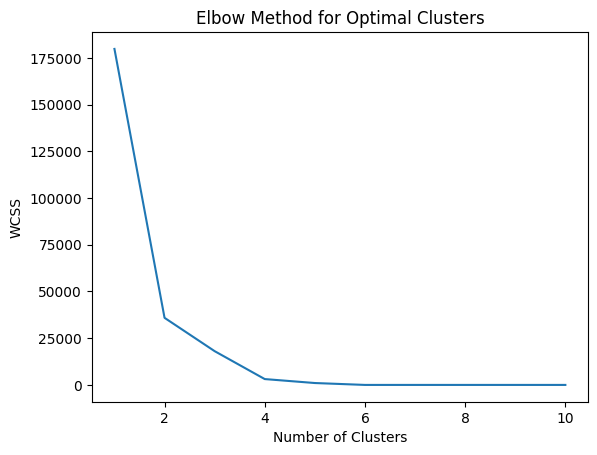

In [ ]:
# Assuming you have the age data
age_data = social_media_data[['Age']].merge(eeg_data[['Age']], on='Age', how='inner')

# Trying different values for number of clusters
wcss = []
for i in range(1, 11):  # You can try up to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(age_data[['Age']])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


/home/mrinalgaur/Desktop/DsProject/DsProject/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/mrinalgaur/Desktop/DsProject/DsProject/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/mrinalgaur/Desktop/DsProject/DsProject/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/mrinalgaur/Desktop/DsProject/DsProject/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possib

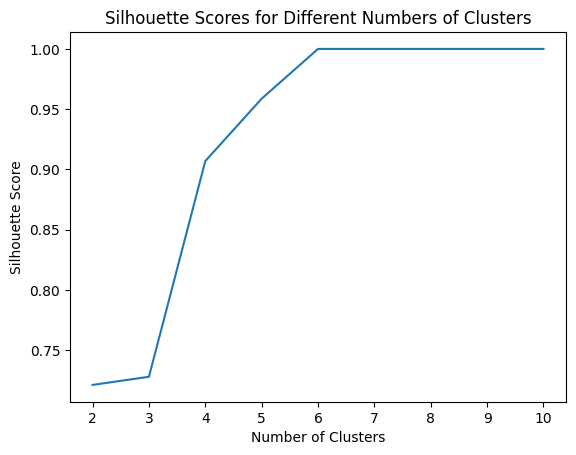

In [56]:
from sklearn.metrics import silhouette_score

sil_scores = []
for i in range(2, 11):  # Silhouette score works better with at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(age_data[['Age']])
    sil_scores.append(silhouette_score(age_data[['Age']], kmeans.labels_))

# Plotting the Silhouette scores
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
